# Objective
Read in a collection of documents - a corpus
Transform text into numerical vector data using a pipeline
Create a classifier
Fit/train the classifier
Test the classifier on new data
Evaluate performance

In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv('moviereviews.tsv', sep='\t')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [5]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [6]:
df.dropna(inplace=True)

# Detect and remove empty string

In [ ]:
# i, lb and rv -> index, label and review 

In [9]:
blanks =[]

for i, lb, rv in df.itertuples():
    if type(rv)==str: #avoid null
        if rv.isspace(): #test for white space
            blanks.append(i) #add matching index to list
            

In [12]:
print(blanks)

[57, 71, 147, 151, 283, 307, 313, 323, 343, 351, 427, 501, 633, 675, 815, 851, 977, 1079, 1299, 1455, 1493, 1525, 1531, 1763, 1851, 1905, 1993]


In [13]:
#drop these 

In [14]:
df.drop(blanks, inplace = True)

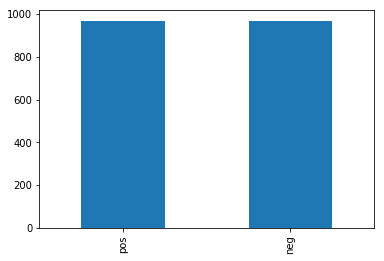

In [17]:
df['label'].value_counts().plot(kind='bar')

In [24]:
#split data
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Build a pipeline to vectorize the data, then train & fit a model

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [20]:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                       ('clf', MultinomialNB()),
                       ])

In [21]:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                         ('clf',LinearSVC())
                         ])

In [22]:
#Feed the training data through the first pipeline¶
#run naïve Bayes first

In [25]:
text_clf_nb.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [26]:
# Form a prediction set
predictions = text_clf_nb.predict(X_test)

In [27]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[287  21]
 [130 202]]


In [28]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.69      0.93      0.79       308
         pos       0.91      0.61      0.73       332

   micro avg       0.76      0.76      0.76       640
   macro avg       0.80      0.77      0.76       640
weighted avg       0.80      0.76      0.76       640



In [29]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.7640625


In [30]:
#Feed the training data through the second pipeline¶
#run Linear SVC

In [31]:
text_clf_lsvc.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [32]:
# Form a prediction set
predictions = text_clf_lsvc.predict(X_test)

In [33]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[259  49]
 [ 49 283]]


In [34]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.84      0.84      0.84       308
         pos       0.85      0.85      0.85       332

   micro avg       0.85      0.85      0.85       640
   macro avg       0.85      0.85      0.85       640
weighted avg       0.85      0.85      0.85       640



In [35]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.846875


In [36]:
#Next, feed new data to the model's predict() method

In [38]:
myreview = ' what the fuck i hate this shit'


In [40]:
myreview1 = 'awss awesome love it so much'

In [39]:
print(text_clf_nb.predict([myreview]))  # be sure to put "myreview" inside square brackets

['neg']


In [41]:
print(text_clf_nb.predict([myreview1]))  # be sure to put "myreview" inside square brackets

['pos']
